# 🏦Loan Approval Prediction Using Random Forest Classifier and XGBoost Optimizer

## 📌 Problem Statement

In the financial sector, evaluating a borrower's creditworthiness is critical to minimizing risk. This project aims to build a **Loan Approval Prediction System** using machine learning models that can help financial institutions automate and improve the loan approval process.

The goal is to predict whether a loan application should be **Approved** or **Rejected** based on the applicant’s financial profile and background.

This system will be deployed as a **Streamlit web app**, where users can fill out a loan application form and receive an instant prediction based on their inputs.

---


## 🛠️ Project Phases

This project is structured into the following key phases to ensure a clear, step-by-step development of a fully functional machine learning web app:

---

### 🔹 Phase 1: Library Imports & Setup
- Import all necessary libraries including `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`, and `xgboost`.
- Install and configure any additional tools or libraries required for preprocessing or model training.

---

### 🔹 Phase 2: Dataset Loading & Exploration
- Load the dataset and check for missing/null values.
- Understand the structure, types, and distribution of features.
- Explore the target variable (`loan_status`) to assess class distribution.

---

### 🔹 Phase 3: Data Cleaning & Preprocessing
- Handle missing values and fix data types.
- Encode categorical variables like `education` and `self_employed`.
- Normalize or scale numerical features if needed.
- Drop irrelevant columns (e.g., `loan_id`).

---

### 🔹 Phase 4: Feature Selection & Engineering
- Select key features that significantly impact loan approval.
- Optionally create derived features (like debt-to-income ratio).

---

### 🔹 Phase 5: Model Building & Training
- Split the data into training and testing sets.
- Train models using:
  - **Random Forest Classifier**
  - **XGBoost Classifier**
- Tune hyperparameters if necessary (e.g., using GridSearchCV).

---

### 🔹 Phase 6: Model Evaluation
- Evaluate models using metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - Confusion Matrix
- Compare models and choose the best-performing one.

---

### 🔹 Phase 7: Model Saving
- Save the trained model and any encoders/vectorizers using `joblib` or `pickle` for later use in the Streamlit app.

---

### 🔹 Phase 8: Streamlit App Development
- Build a user interface that:
  - Takes loan application inputs through a form.
  - Predicts the loan status using the trained model.
- Display prediction results with a user-friendly message.

---

### 🔹 Phase 9: Deployment
- Upload the project to **GitHub**.
- Deploy the web app on **Streamlit Cloud** for public access.

---

Each phase builds upon the previous one to create a complete machine learning-powered loan approval prediction system accessible via the web.


##📊 Dataset Overview

The dataset contains information on **4,269** loan applicants with the following features:

- `loan_id`: Unique identifier for the loan
- `no_of_dependents`: Number of dependents the applicant has
- `education`: Educational qualification (Graduate / Not Graduate)
- `self_employed`: Whether the applicant is self-employed (Yes / No)
- `income_annum`: Annual income of the applicant
- `loan_amount`: Total amount of loan requested
- `loan_term`: Loan repayment duration (in months)
- `cibil_score`: Credit score of the applicant
- `residential_assets_value`: Value of residential assets owned
- `commercial_assets_value`: Value of commercial assets owned
- `luxury_assets_value`: Value of luxury assets owned (e.g., cars, valuables)
- `bank_asset_value`: Amount of money the applicant has in the bank
- `loan_status`: Target label – **Approved** or **Rejected**

This dataset includes both numerical and categorical variables. Our goal is to clean the data, encode the categorical features, and train a classification model that predicts the `loan_status`.

**🔗 Dataset Source**: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## 🧠 Algorithms Used

To solve the classification problem of loan approval, we are using two powerful machine learning algorithms:

---

### ✅ Random Forest Classifier

**Random Forest** is an ensemble learning method that builds multiple decision trees and merges their results for more accurate and stable predictions. It reduces overfitting and improves generalization by introducing randomness in feature selection and data sampling.

📚 **Learn more**: [Scikit-Learn – RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

---

### 🚀 XGBoost Classifier (Extreme Gradient Boosting)

**XGBoost** is a highly efficient and scalable implementation of gradient boosting. It builds trees sequentially, where each tree tries to correct the errors of the previous one. It uses advanced regularization (L1 & L2) to prevent overfitting and is often the go-to algorithm for structured/tabular data.

📚 **Learn more**: [Official XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)

---

These algorithms will be evaluated based on performance metrics such as accuracy, precision, recall, and F1-score to select the best-performing model for deployment.


---
---
#Project Build


---

### 🔹 Phase 1: Configuration & Setup
- Import all necessary libraries
- Install and configure any additional tools or libraries required for preprocessing or model training.


#### 📚 Library Imports:
####Libraries used:
- **pandas**: For loading and manipulating tabular data (e.g., CSV files).
- **numpy**: Provides support for high-performance mathematical operations and array processing.
- **joblib**: Used to save and load the trained ML models in `.pkl` format.
- **warnings**: Suppresses warning messages for a cleaner output.
- **matplotlib.pyplot**: A basic but powerful plotting library for visualizing distributions and trends.
- **seaborn**: Built on top of matplotlib, it helps create more attractive and informative statistical plots like heatmaps and bar charts.
- **LabelEncoder** *(from sklearn.preprocessing)*: Converts categorical values (like "Graduate", "Yes"/"No") into numeric form.
- **train_test_split** *(from sklearn.model_selection)*: Splits the dataset into training and testing subsets.
- **gridsearchcv** *(from sklearn.model_selection)*: For Hyperparameter tuning.
- **RandomForestClassifier** *(from sklearn.ensemble)*: A tree-based ensemble model that works well for both classification and regression.
- **XGBClassifier** *(from xgboost)*: An optimized implementation of gradient boosting that often provides higher accuracy and performance.
- **accuracy_score** *(from sklearn.metrics)*: Measures how many predictions match the actual labels.
- **confusion_matrix** *(from sklearn.metrics)*: Displays true positives, false positives, true negatives, and false negatives.
- **classification_report** *(from sklearn.metrics)*: Summarizes precision, recall, F1-score, and support for each class.



In [1]:
import pandas as pd
import numpy as np
import joblib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, accuracy_score

warnings.filterwarnings('ignore')

---
##🔹 Phase 2: Dataset Loading & Exploration
- Load the dataset and check for missing/null values.
- Understand the structure, types, and distribution of features.
- Explore the target variable (`loan_status`) to assess class distribution.


####📥 Data Loading
Let’s begin by loading the loan approval dataset into our notebook using pandas. This dataset contains applicant information such as income, CIBIL score, employment details, and asset values, which we’ll use to predict loan approval status.

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
print(f"Dataset Loaded Successfully! Shape: {df.shape}")
df.head()

Dataset Loaded Successfully! Shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


####🧹Data Handling
- Check for missing or null values that may require imputation or removal in the cleaning phase.

- Understand the features by reviewing column names, their meanings, and identifying categorical vs. numerical variables.

- Assess target variable (loan_status) distribution to determine if class imbalance exists, which may impact model performance.




In [3]:
print('Columns in the dataset are:', df.columns)

Columns in the dataset are: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
print('Object column categories are:')
for col in df.columns:
  if df[col].dtype == 'object':
    print(f'{col}: {df[col].unique()}')

Object column categories are:
 education: [' Graduate' ' Not Graduate']
 self_employed: [' No' ' Yes']
 loan_status: [' Approved' ' Rejected']


In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [8]:
print("\nDuplicate Entries:", df.duplicated().sum())


Duplicate Entries: 0


In [9]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


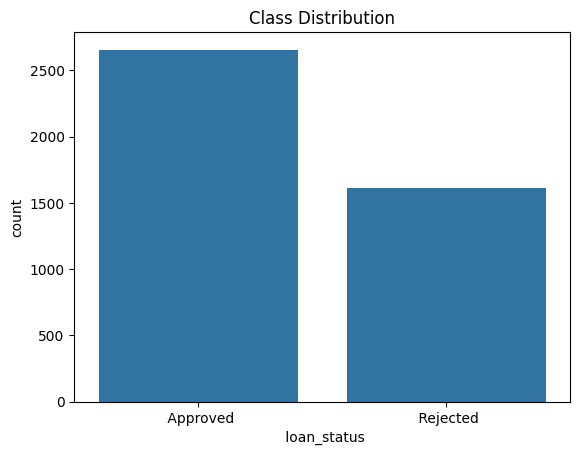

In [10]:
sns.countplot(data=df, x=' loan_status')
plt.title('Class Distribution')
plt.show()

Since there are no missing values or duplicate entries, data doesnt need to be cleaned. So we will proceed directly to data Exploration part.

###🧪Data Exploration
In this phase, we perform detailed data exploration to understand the distribution, relationships, and patterns in the dataset. This helps inform the data preprocessing and model-building stages.

1. Univariate Analysis
Goal: Explore the distribution of each feature independently.

2. Bivariate Analysis
Goal: Explore the relationship between each feature and the target variable loan_status.

3. Multivariate Analysis
Goal: Understand interactions among multiple variables simultaneously.


In [11]:
numerical_cols = []
categorical_cols = []
for col in df.columns:
  if df[col].dtype == 'object':
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)
print('Numerical Columns:', numerical_cols)
print('Categorical Columns:', categorical_cols)

Numerical Columns: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
Categorical Columns: [' education', ' self_employed', ' loan_status']


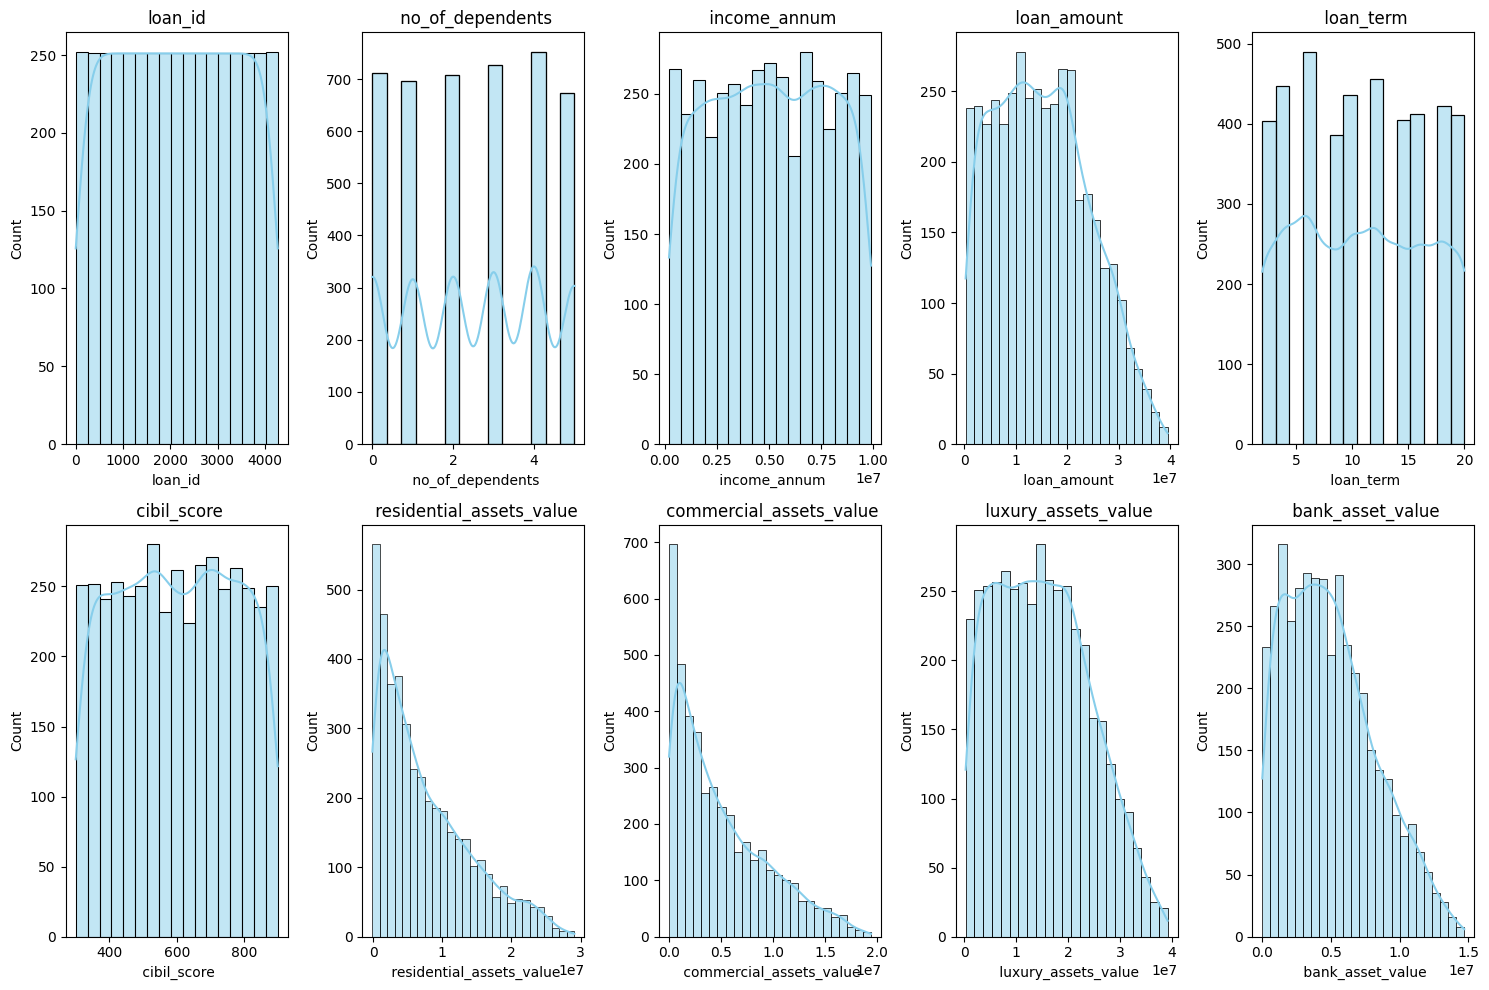

In [12]:
plt.figure(figsize=(15,10))
for i in range(len(numerical_cols)):
  plt.subplot(2,5,i+1)
  sns.histplot(data=df, x=numerical_cols[i], kde=True, color='skyblue')
  plt.title(numerical_cols[i])
plt.tight_layout()
plt.show()


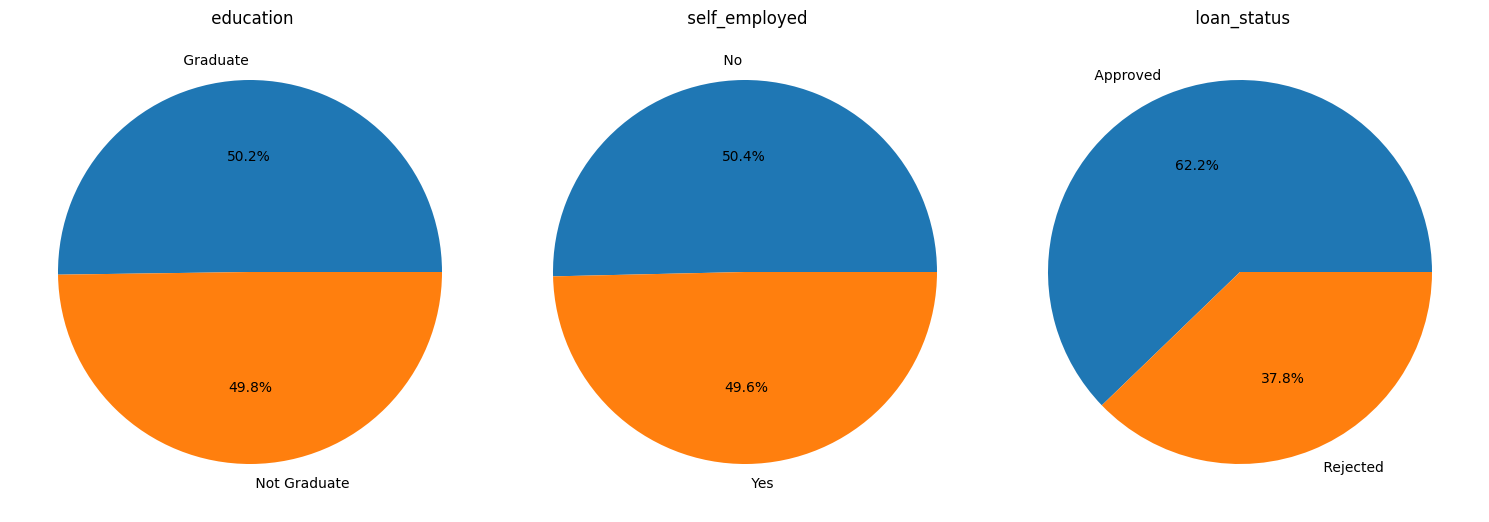

In [13]:
plt.figure(figsize=(15,10))
for i in range(len(categorical_cols)):
  plt.subplot(1,3,i+1)
  plt.pie(df[categorical_cols[i]].value_counts(), labels=df[categorical_cols[i]].unique(), autopct='%1.1f%%')
  plt.title(categorical_cols[i])
plt.tight_layout()
plt.show()


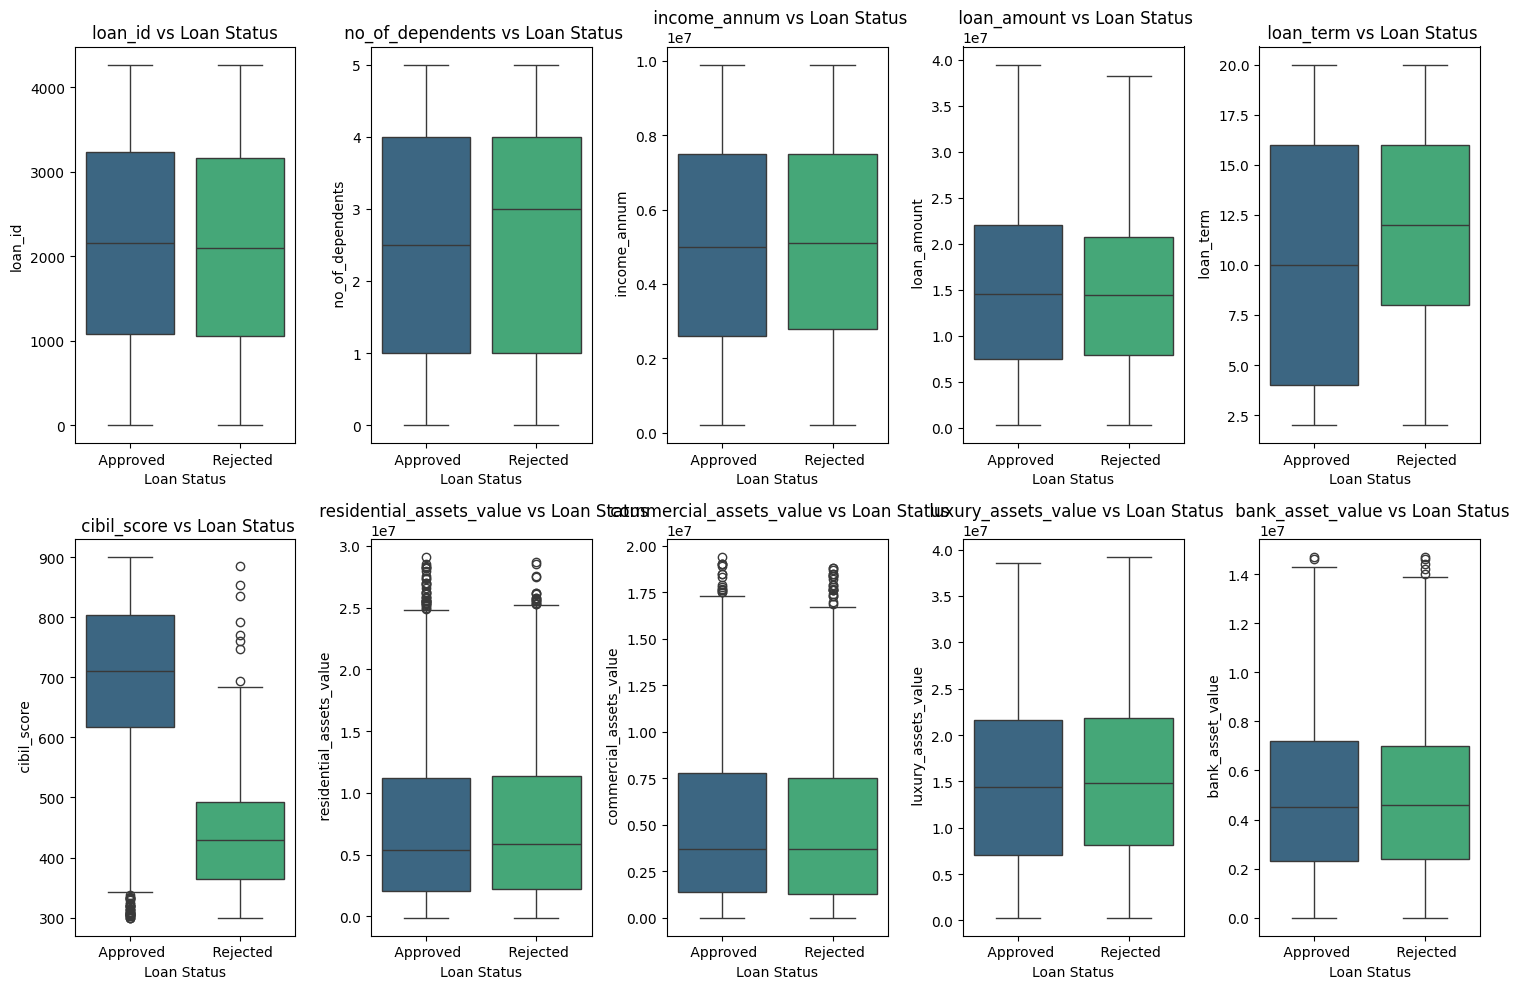

In [14]:
# prompt: plot the boxplot of all numerical columns vs target column ie loanstatus

plt.figure(figsize=(15,10))
for i in range(len(numerical_cols)):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(data=df, x=' loan_status', y=numerical_cols[i], palette='viridis')
    plt.title(f'{numerical_cols[i]} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(numerical_cols[i])
plt.tight_layout()
plt.show()

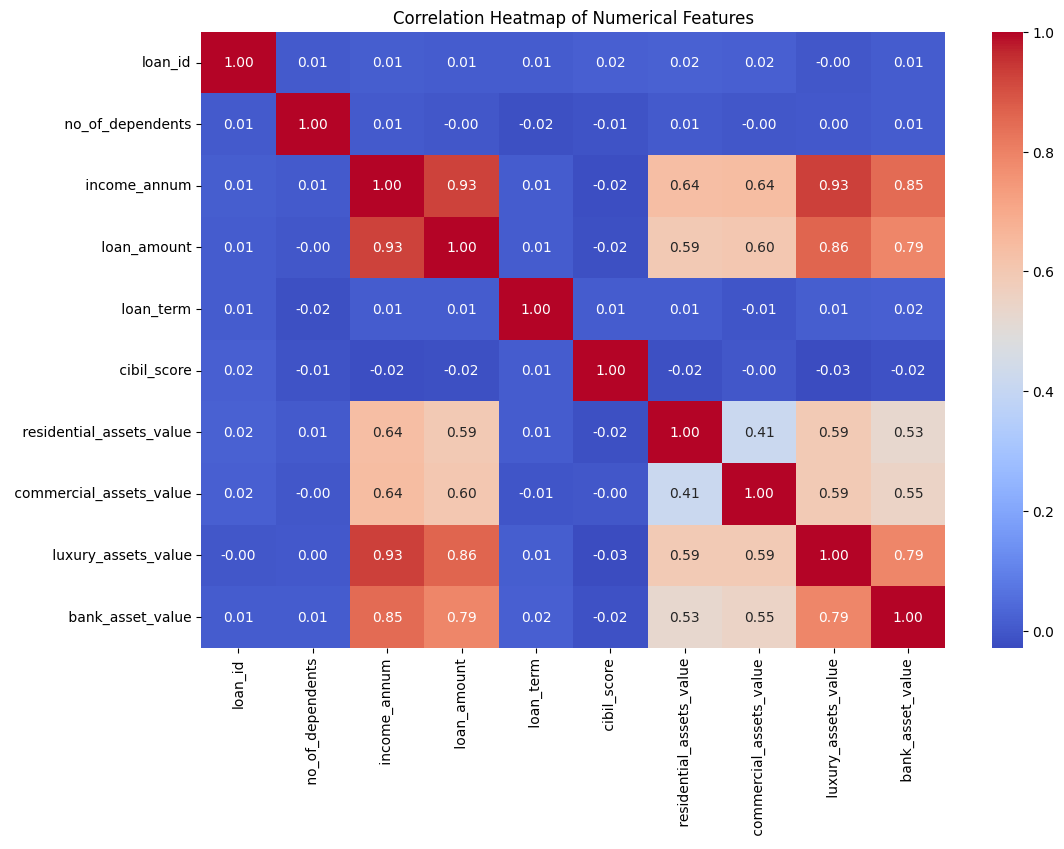

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [16]:
sns.pairplot(df, hue=' loan_status')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

📌 Conclusion from Data Exploration
After conducting univariate, bivariate, and multivariate analysis, we gained several useful insights:

The dataset has a mix of numerical and categorical features.

There are no missing values, which simplifies preprocessing.

The target column `loan_status` is slightly imbalanced but still within acceptable range for tree-based models.

A few numerical features (e.g., `loan_amount`, `luxury_assets_value`) exhibit signs of outliers.

Categorical features like `education` and `self_employed` are important and need to be encoded appropriately.

---
## 🔹 Phase 3: Data Cleaning & Preprocessing
- Handle missing values and fix data types.
- Encode categorical variables like education and self_employed.
- Normalize or scale numerical features if needed.
- Drop irrelevant columns (e.g., loan_id).

###🧹 **Data Cleaning**

In this phase, we prepare the dataset for model training by performing the following steps:
### 🔻 Drop Irrelevant Columns

- The `loan_id` column is just a unique identifier and does not contribute to prediction.
- Hence, we remove it from the dataset.


### 🔁 Encode Categorical Variables

The dataset contains categorical features such as:

- `education` (e.g., *Graduate*, *Not Graduate*)
- `self_employed` (e.g., *Yes*, *No*)
- `loan_status` (our target variable, e.g., *Approved*, *Rejected*)

These are converted to numerical format using **Label Encoding**, which assigns a unique integer to each category.

✅ This minimal cleaning is sufficient since our model (**Random Forest with XGBoost**) can handle unscaled and non-normalized numerical features effectively.


In [17]:
df = df.drop(' loan_id', axis=1)
label_encoders = {}
categorical_cols = [' education', ' self_employed', ' loan_status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


###⚙️ **Data Preprocessing**

In this step, we enhance data quality to improve model performance by applying the following techniques:


### 📉 Outlier Handling

- Outliers in numerical features like `income_annum`, `loan_amount`, and `cibil_score` can skew model predictions.
- We detect and treat these outliers using the **Interquartile Range (IQR)** method by capping/flooring extreme values.

### 📊 Feature Scaling

- We apply **Min-Max Normalization** to scale all numerical features to a common range.
- This helps algorithms like **XGBoost** converge faster and treat features more uniformly.


✅ These preprocessing techniques ensure the dataset is **clean**, **consistent**, and ready for **robust model training**.


In [18]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

outlier_columns = [' income_annum', ' loan_amount', ' cibil_score']

for col in outlier_columns:
    cap_outliers_iqr(df, col)

In [19]:
scaler = MinMaxScaler()
df[outlier_columns] = scaler.fit_transform(df[outlier_columns])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,0.969072,0.755102,12,0.796667,2400000,17600000,22700000,8000000,0
1,0,1,1,0.402062,0.303571,8,0.195000,2700000,2200000,8800000,3300000,1
2,3,0,0,0.917526,0.750000,20,0.343333,7100000,4500000,33300000,12800000,1
3,3,0,0,0.824742,0.775510,8,0.278333,18200000,3300000,23300000,7900000,1
4,5,1,1,0.989691,0.609694,20,0.136667,12400000,8200000,29400000,5000000,1


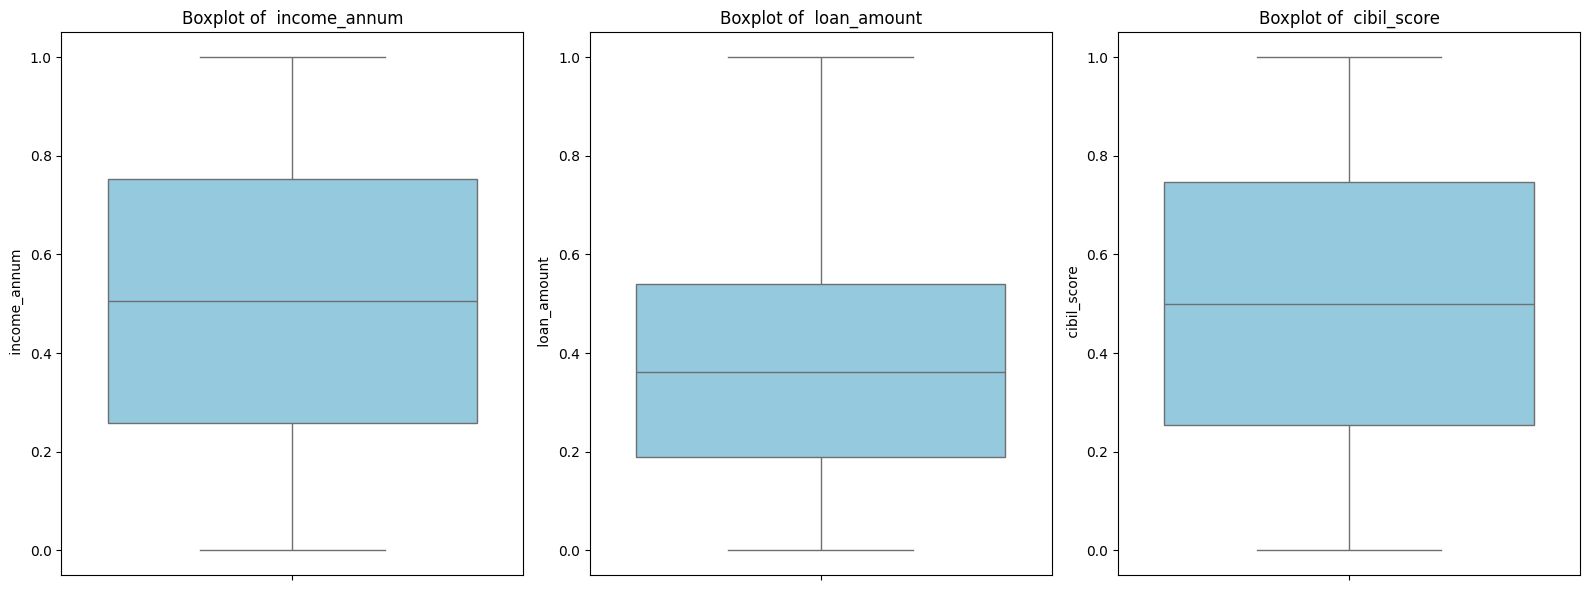

In [20]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(outlier_columns):
    plt.subplot(1, len(outlier_columns), i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

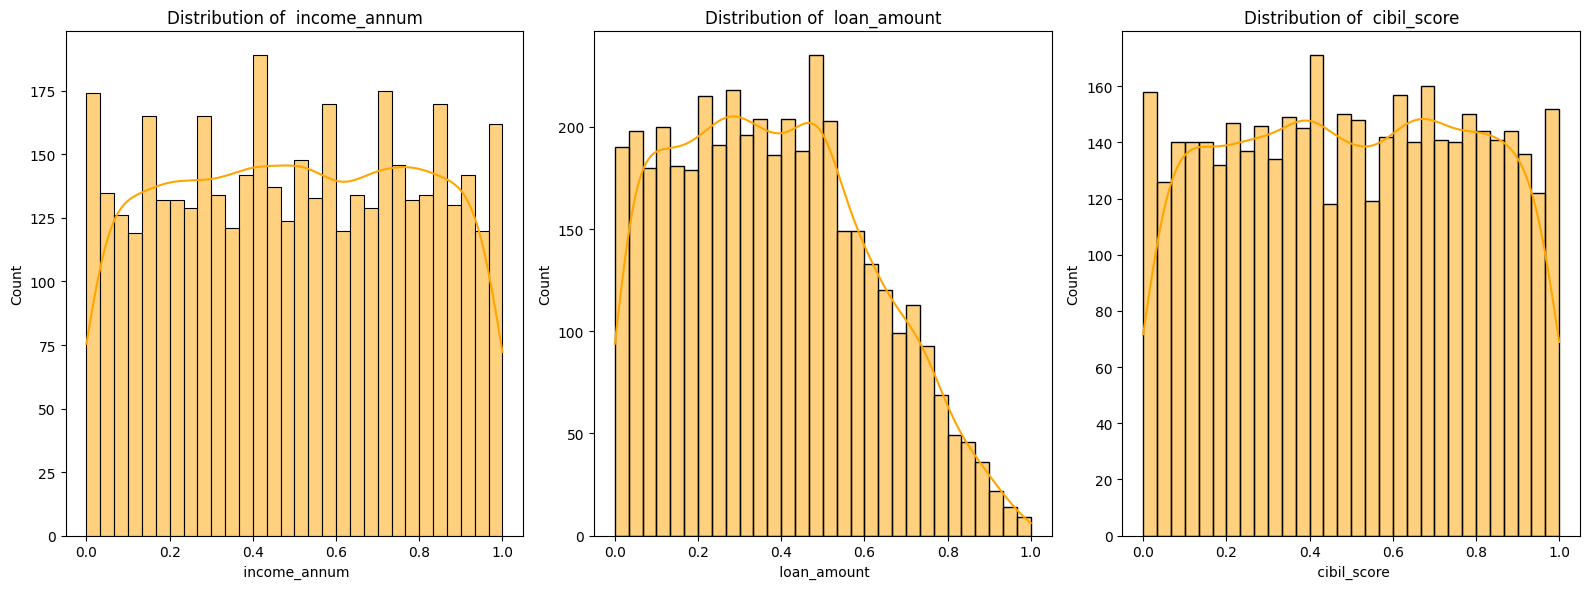

In [21]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(outlier_columns):
    plt.subplot(1, len(outlier_columns), i+1)
    sns.histplot(df[col], bins=30, kde=True, color="orange")
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

With the dataset now cleaned, encoded, normalized, and free from significant outliers, we are ready to move forward.

In the next phase, we will:

Split the dataset into training and testing sets

Train a **Random Forest Classifier**

Use **XGBoost** for hyperparameter tuning to optimize performance

This will help us build a robust and accurate loan approval prediction model.

---
##🔹 Phase 5: Model Building & Evaluation

In this phase, we build and evaluate machine learning models for predicting loan approval.

### 🔸 1. Data Splitting

- The dataset is split into **training and testing sets** using an **80:20 ratio**.
- This ensures the model is trained on a majority of the data and tested on unseen data to evaluate generalizability.

### 🔸 2. Model Training

We train and compare the following classification models:

- ✅ **Random Forest Classifier**: A robust ensemble model based on decision trees.
- ✅ **XGBoost Classifier**: An optimized gradient boosting algorithm known for performance and speed.


### 🔸 3. Hyperparameter Tuning

We use **GridSearchCV** for hyperparameter tuning to improve model performance.

**Tuned Parameters:**

- **XGBoost:** `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`
- **Random Forest:** `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`


### 🔸 4. Model Evaluation

We evaluate the models using the following metrics:

- 📌 **Accuracy Score** – Proportion of correct predictions.
- 📌 **Classification Report** – Includes precision, recall, and F1-score.
- 📌 **ROC Curve & AUC Score** – Evaluates the model’s discriminatory power.



### 🔀Data Splitting
To evaluate our model effectively, we split the dataset into training and testing sets.
We used an 80:20 split.

In [22]:
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (3415, 11) (3415,)
Testing set shape: (854, 11) (854,)


### 🌲Random Forest Model

#### 🏋️Training

In [23]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


####🧪Testing

In [24]:
y_pred = best_rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [25]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Comparison:")
comparison_df.head()


Actual vs Predicted Comparison:


,Actual,Predicted
2346,0,0
1162,0,0
3061,0,0
483,1,1
2102,0,0


####📊Evaluation

In [26]:
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy Score: 0.9824355971896955
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.96      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

🔁 Confusion Matrix:
 [[528   3]
 [ 12 311]]


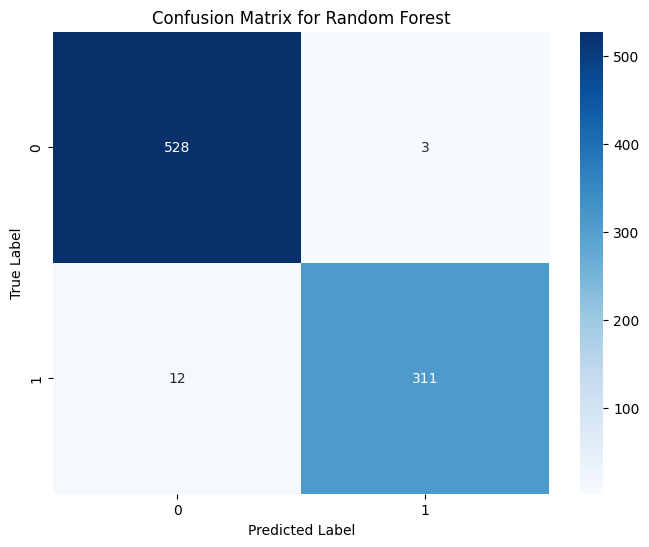

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

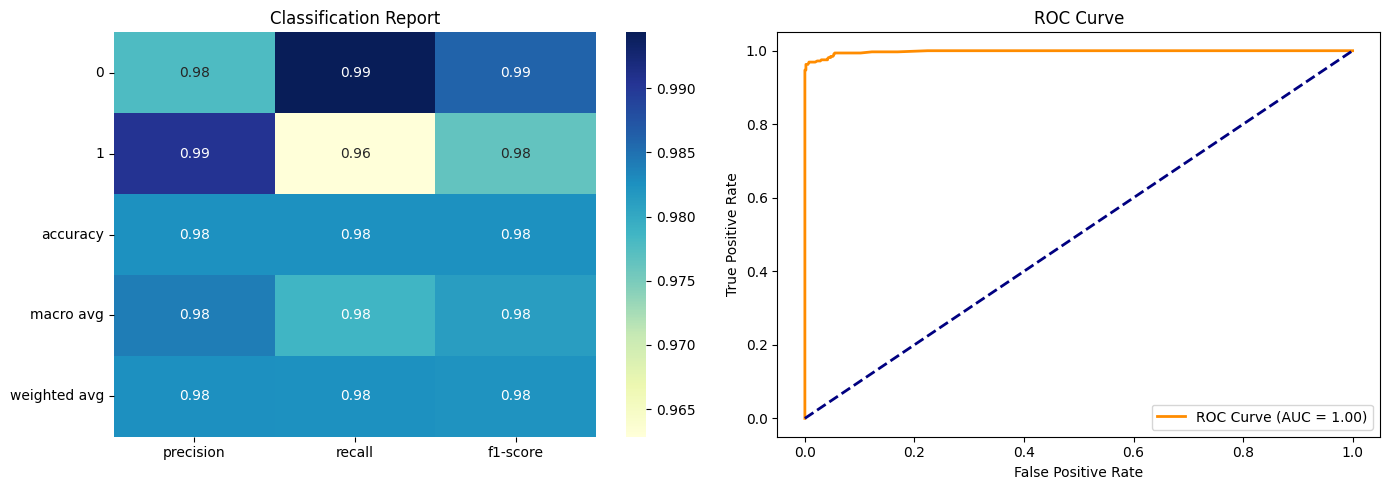

In [28]:
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Classification Report")
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title("ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
plt.tight_layout()
plt.show()

### 🌲XGBoost Model

####🏋️Training

In [29]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


####🧪Testing

In [30]:
xgb_y_pred = best_xgb_model.predict(X_test)
xgb_y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [31]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_y_pred})
print("\nActual vs Predicted Comparison:")
comparison_df.head()


Actual vs Predicted Comparison:


,Actual,Predicted
2346,0,0
1162,0,0
3061,0,0
483,1,1
2102,0,0


####📊Evaluation

✅ Accuracy Score: 0.9812646370023419
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

🔁 Confusion Matrix:
 [[526   5]
 [ 11 312]]


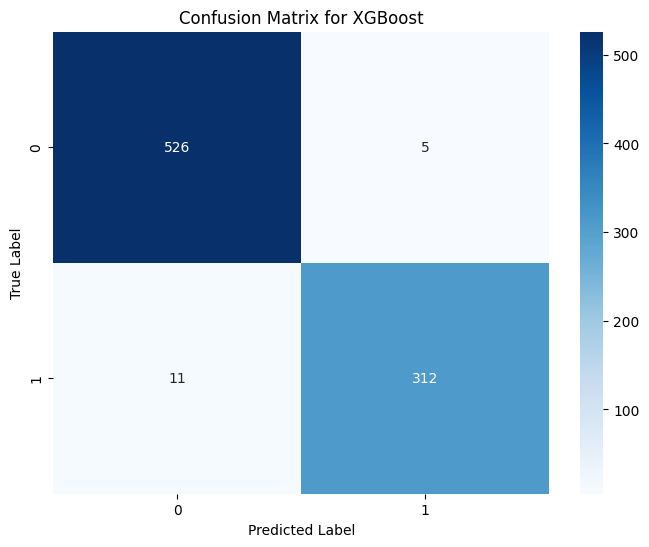

In [32]:
print("✅ Accuracy Score:", accuracy_score(y_test, xgb_y_pred))
print("📊 Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

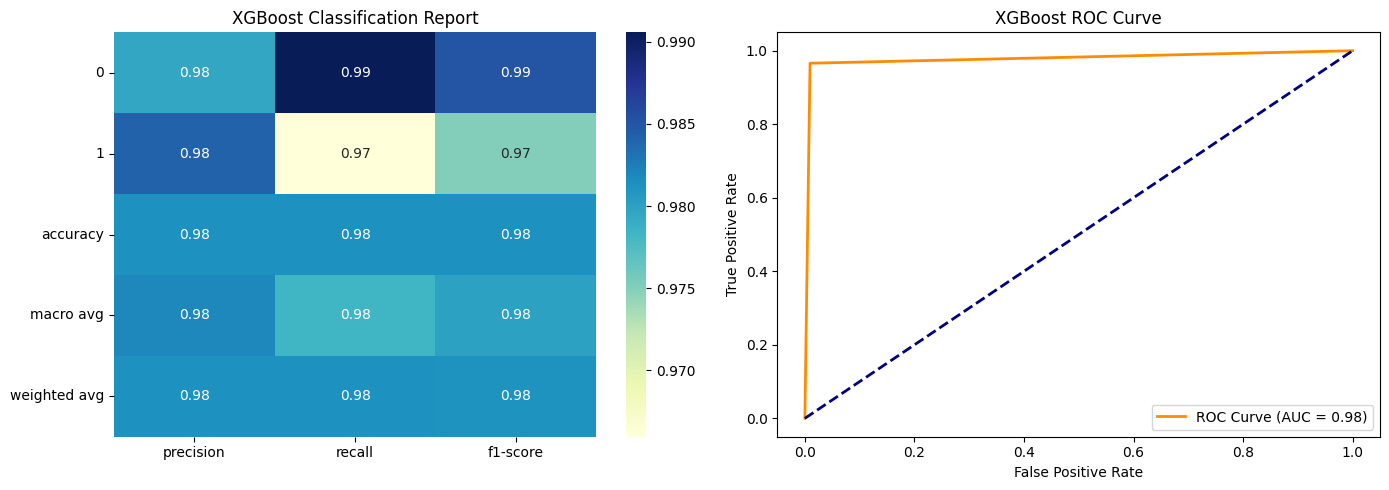

In [33]:
xgb_report = classification_report(y_test, xgb_y_pred, output_dict=True)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(pd.DataFrame(xgb_report).iloc[:-1, :].T, annot=True, cmap='YlGnBu', ax=axes[0])
axes[0].set_title("XGBoost Classification Report")
axes[1].plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {xgb_roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title("XGBoost ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
plt.tight_layout()
plt.show()

###🧠 **Final Insights**

- Both models exhibit **high accuracy** and strong **generalization performance**.
- **Random Forest** shows a slight edge in **recall** and produces fewer **false positives**.
- Based on performance and interpretability, **Random Forest** can be chosen as the **final model**.
- However, **XGBoost** remains a strong alternative for deployment scenarios where **boosting performance** is critical.


---
## 🔹 Phase 6: Model Test Run

Now lets test our models on sample inputs.

In [34]:
sample_input = pd.DataFrame({
    ' no_of_dependents': [2],
    ' education': [1],
    ' self_employed': [0],
    ' income_annum': [9600000],
    ' loan_amount': [29900000],
    ' loan_term': [12],
    ' cibil_score': [778],
    ' residential_assets_value': [2400000],
    ' commercial_assets_value': [17600000],
    ' luxury_assets_value': [22700000],
    ' bank_asset_value': [8000000]
})
rf_prediction = best_rf.predict(sample_input)
print("Random Forest Prediction:", "Approved" if rf_prediction[0] == 1 else "Rejected")
xgb_prediction = best_xgb_model.predict(sample_input)
print("XGBoost Prediction:", "Approved" if xgb_prediction[0] == 1 else "Rejected")

Random Forest Prediction: Rejected
XGBoost Prediction: Rejected


Okay so the outputs on sample inputs are satisfactory. Let's save the models to use them in out application.

---
##🔹Phase 7: Model Saving

In [35]:
joblib.dump(best_rf, 'RanForModel.pkl')
joblib.dump(best_xgb_model, 'XBModel.pkl')

['XBModel.pkl']

**Okay so we are done and we will use the models in Building our application**

---
---
#END

---
---